In [1]:
## prepare env, read and prepare data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

codepath = '.././2_code' ## for import of user defined module
datapath = '../../3_data'
from sys import path; path.insert(1, codepath)
from os import chdir; chdir(datapath)

from bfh_cas_pml import prep_data
X_train, X_test, y_train, y_test = prep_data('bank_data_prep.csv', target='y', seed=1234)

In [2]:
## Funktionen (Klassen) importieren
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier ## optional
from lightgbm.sklearn import LGBMClassifier ## optional
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
import time  ## für Zeitmessung

In [3]:
## Modelle definieren und in Liste hinterlegen
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(min_impurity_decrease=0.002),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    HistGradientBoostingClassifier(),
    CatBoostClassifier(logging_level='Silent'), ## optional
    LGBMClassifier(), ## optional
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    SVC(kernel='rbf', probability=True, gamma='auto'), ## dauert zu lange
    GaussianNB(),
    MLPClassifier(),
    LogisticRegression(max_iter=1000)
]

In [4]:
## zum Sammeln der Resultate
scores = []
times_fit = []
times_pred = []
model_names = []

print('Classifier                          Score      Time fit    Time pred')
print('====================================================================')

## Loop
for model in models:
    
    ## start timer1 - fit - stop timer1
    start_time_fit = time.time()
    model.fit(X_train, y_train)
    time_fit = time.time() - start_time_fit
    
    ## start timer2 - predict - stop timer2
    start_time_pred = time.time()
    y_pred = model.predict(X_test)
    time_pred = time.time() - start_time_pred
    
    ## berechne Score & pick Modellname
    score = accuracy_score(y_test, y_pred)
    model_name = model.__class__.__name__  ## Modellname extrahieren (f. Output)
    
    ## Ergebnisse an vorbereitete Listen anhängen
    scores.append(score)
    times_fit.append(time_fit)
    times_pred.append(time_pred)
    model_names.append(model_name)
    
    ## Iterationsergebnisse in Konsole ausgeben (optional)
    print('%-32s   %7.4f    %7.4f     %7.4f' % (model_name, score, time_fit, time_pred))  ## console output

Classifier                          Score      Time fit    Time pred


C:\Users\werne\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\werne\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


KNeighborsClassifier                0.7493     0.0159      1.1670
DecisionTreeClassifier              0.8588     0.0321      0.0000
RandomForestClassifier              0.8771     1.6460      0.1163


C:\Users\werne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier                  0.8585     1.2637      0.0591
GradientBoostingClassifier          0.8768     2.1752      0.0141
HistGradientBoostingClassifier      0.8820     1.0203      0.0312
CatBoostClassifier                  0.8829    11.0474      0.0157
[LightGBM] [Info] Number of positive: 3087, number of negative: 3486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 6573, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.469649 -> initscore=-0.121555
[LightGBM] [Info] Start training from score -0.121555
LGBMClassifier                      0.8850     0.4560      0.0156
LinearDiscriminantAnalysis          0.8488     0.0790      0.0000
QuadraticDiscriminantAnalysis       0.7247     0.0

C:\Users\werne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


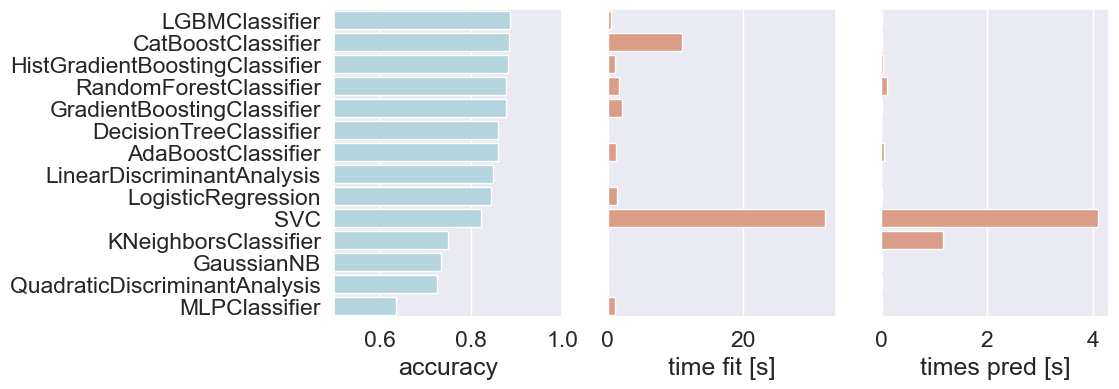

In [5]:
## vizualisation, ordered by decreasing accuracy

results = pd.DataFrame({
    'models' : model_names,
    'scores' : scores,
    'times_fit' : times_fit,
    'times_pred' : times_pred}
).sort_values(by='scores', ascending=False)
#print(results)

order = results.sort_values('scores', ascending=False).models

sns.set(font_scale=1.5) 
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4), sharex=False)

ax = sns.barplot(data=results, x=scores, y=model_names, color='lightblue', order=order, ax=axes[0])
ax.set_xlabel('accuracy')
ax.set(xlim=(0.5, 1))

ax = sns.barplot(x=times_fit, y=model_names, color='darksalmon', order=order, ax=axes[1])
ax.set_xlabel('time fit [s]')
ax.set_yticklabels('')
ax.set_ylabel('')

ax = sns.barplot(x=times_pred, y=model_names, color='darksalmon', order=order, ax=axes[2])
ax.set_xlabel('times pred [s]')
ax.set_yticklabels('')
ax.set_ylabel('');

In [6]:
## Zusammenfassung des besten Modells
print('best_model     :', model_names[scores.index(max(scores))])
print('best_score     :', max(scores))
print('best_pred_time :', times_pred[scores.index(max(scores))])
print('best_fit_time  :', times_fit[scores.index(max(scores))])

best_model     : LGBMClassifier
best_score     : 0.8850015211439002
best_pred_time : 0.015624046325683594
best_fit_time  : 0.45603370666503906


In [7]:
## print top 5 models
print(pd.DataFrame({
    'models': model_names,
    'scores': scores
}).sort_values(by='scores', ascending=False).head(5))

                           models    scores
7                  LGBMClassifier  0.885002
6              CatBoostClassifier  0.882872
5  HistGradientBoostingClassifier  0.881959
2          RandomForestClassifier  0.877092
4      GradientBoostingClassifier  0.876787


**Fazit:**  
(für diese Datenlage!)
* Top 5 accuracy_score: 
  * LGBMClassifier
  * CatBoostClassifier
  * HistGradientBoostingClassifier
  * RandomForestClassifier
  * GradientBoostingClassifier
  
* Long runners:
  * CatBoostClassifier
  * SVC
  
* für weitere Untersuchungen, z.B. verfeinertes Parameter Tuning könnten aus obiger Zusammenstellung 3 bis 5 Methoden ausgewählt werden
* ein weiteres Kriterium, welches aber erst im Rahmen von Validierung (Kap. 4) in Betracht zu ziehen wäre ist die Abhängigkeit der Performance von random_state, die **Stabilität** (mehr dazu aber zu gegebener Zeit)



**optional: wie wirkt sich Skalierung (z.B. mit StandardScaler) auf die Performance von MLPClassifier aus?**

In [10]:
## scale features with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## MLPClassifier score without scaling
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state = 1234)
model.fit(X_train, y_train) 
print(model.score(X_test, y_test))

## MLPClassifier score with scaling
model = MLPClassifier(max_iter=1000, random_state = 1234)
model.fit(X_train_scaled, y_train) 
print(model.score(X_test_scaled, y_test))

## show number of iterations
print(model.n_iter_)

0.6975965926376635
0.8256769090355948
804


**Fazit:**
* wird tatsächlich besser, erreicht aber mit der gegebenen Parametrisierung die Performance der besten Ensemble Methoden nicht